# **Project Title: Customer Retention Analyzer**

## **Abstract:**

In the highly competitive telecommunications industry, retaining customers is a significant challenge that directly impacts both revenue and market share. This project focuses on analyzing retention patterns within a telecom company to uncover the key factors influencing customer decisions. By leveraging historical customer data, including demographics, service usage, and interaction logs, the analysis aims to provide deeper insights into customer behavior. Through exploratory data analysis and predictive modeling, the project will identify critical drivers of customer attrition, such as service dissatisfaction, pricing models, contract terms, and the effectiveness of customer support.

## **Problem Statement:**

The objective of this project is to analyze customer retention in a telecom company. Customer churn, the process where customers either switch to a different service provider or cancel their subscription, poses a significant challenge. By examining customer retention patterns, this project seeks to identify the key factors that drive churn and develop strategies to reduce it, ultimately improving customer loyalty and retention.

## **Project Description:**

In this project, we will utilize a dataset from a telecom company that contains comprehensive customer information, including demographics, billing details, and service usage metrics. The dataset also includes an indicator specifying whether a customer has left the service or remained loyal.

## **Project Objective:**  
The primary goal of this project is to identify the key factors contributing to call drops and poor voice connectivity. Additionally, we aim to build a classification model that can accurately predict call drops, enabling proactive measures to improve service quality and customer retention.

## **Desired Outcome:**

Our main objective is to create a computer program that can forecast when a customer is at risk of leaving the company.

## **Dataset Overview:**

• gender: Whether the customer is a male or a female.

• SeniorCitizen: Whether the customer is a senior citizen or not (1, 0).

• Partner: Whether the customer has a partner or not (Yes, No)

• Dependents : Whether the customer has dependents or not (Yes, No)

## **Customer Accounting Information:**


• Contract: The contract term of the customer (Month-to-month, One year, Two year)

• PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)

• MonthlyCharges: The amount charged to the customer monthly

• TotalCharges: The total amount charged to the customer

• tenure: Number of months the customer has stayed with the company

• PaymentMethod: The customer's payment method (Electronic check, Mailed check, Bank transfer (au card (automatic)))

• customeriD: Customer ID

## **Service Information:**

PhoneService: Whether the customer has a phone service or not (yes, No)

• MultipleLines: Whether the customer has multiple lines or not (yes, No, No phone service)

• InternetService: Customer's internet service provider (DSL, Fiber optic, No)

• OnlineSecurity: Whether the customer has online security or not (yes, No, No internet service)

• OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

• DeviceProtection: Whether the customer has device protection or not (yes, No, No internet service)

• TechSupport: Whether the customer has tech support or not (yes, No, No internet service)

• Streaming TV: Whether the customer has streaming TV or not (Yes, No, No internet service)

•StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)


## **Target Variable:**
• Churn: Whether the customer churn or not (yes or No)*

### **Data Preparation - (EDA & Feature Engineering):**

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Finding the unique values 

for col in df.columns:
    print('Column: {} - unique values: {}'.format(col, df[col].unique()))

Column: customerID - unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - unique values: ['Female' 'Male']
Column: SeniorCitizen - unique values: [0 1]
Column: Partner - unique values: ['Yes' 'No']
Column: Dependents - unique values: ['No' 'Yes']
Column: tenure - unique values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - unique values: ['No' 'Yes']
Column: MultipleLines - unique values: ['No phone service' 'No' 'Yes']
Column: InternetService - unique values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - unique values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - unique values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - unique values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

In [7]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
len(df.columns)

21

In [9]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

• df.TotalCharges: This is accessing the TotalCharges column of the DataFrame df.

• pd.to_numeric(): This is a function from the Pandas library that converts a column or a series to a numeric data type.

• errors = 'coerce': This is an argument of the pd.to_numeric() function that specifies how to handle errors during the conversion process. In this case, errors = 'coerce' means that if a value cannot be converted to a numeric data type, it will be replaced with NaN (Not a Number) instead of raising an error.

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


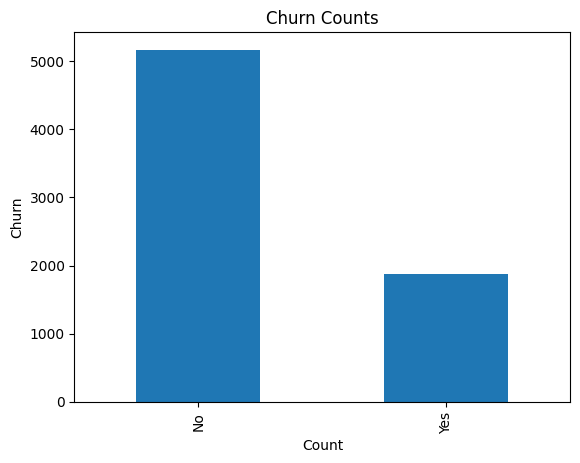

In [12]:
# Plotting the churn counts

df['Churn'].value_counts().plot(kind = 'bar')
plt.xlabel('Count')
plt.ylabel('Churn')
plt.title('Churn Counts')
plt.show()


In [13]:
df['Churn'].value_counts() / len(df)

Churn
No     0.73463
Yes    0.26537
Name: count, dtype: float64

In [14]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [15]:
# Additional information
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df2 = df.copy()

In [17]:
df2.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
df2.loc[df2['TotalCharges'].isna() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


`df2.loc[df2['TotalCharges'].isna() == True]` selects all rows from the DataFrame df2 where the value in the "TotalCharges" column is missing or null.

In [19]:
df2.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [20]:
df2.isna().sum() / len(df2)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

### **Treating with Missing Values:**

Since the % of these records compared to total dataset is very low ie 0.0015%, it is safe to ignore them from further processing.

In [21]:
# Removing the null values

df2.dropna(how = 'any', inplace = True)

- df2 is the name of the Pandas DataFrame.

- dropna() is a function in Pandas that is used to remove rows (or columns) with missing values.

- how = 'any' is a parameter of the dropna() function. It specifies that if any value in a row is missing, the entire row should be dropped. If how = 'all' was used instead, only rows with all values missing would be dropped.

- inplace = True means that the original DataFrame df2 will be modified directly. 
- If inplace = False was used, a new DataFrame without the rows with missing values would be returned, and the original DataFrame would remain unchanged.

Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [22]:
# Getting the max tenure

print(df2['tenure'].max())

72


In [23]:
# Defining the bins and labels
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

# Creating the tenure_group column
df2['tenure_group'] = pd.cut(df2['tenure'], bins = bins, labels = labels, right = False)

- `bins` is a list of integers that define the boundaries of the bins. In this case, the bins are defined as [0, 12, 24, 36, 48, 60, 72]. These values will be used to divide the tenure column into groups.

- `labels` is a list of strings that will be used to label each bin. The labels are ['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']. These labels will be assigned to the corresponding bins.


**Creating the tenure_group column**

The code then uses the pd.cut function from pandas to create a new column called `tenure_group` in the df2 DataFrame.

- `pd.cut` is a function that bins values into discrete intervals.
- The tenure column of df2 is passed as the first argument to pd.cut.
- The bins list is passed as the bins argument to pd.cut, which defines the boundaries of the bins.
- The labels list is passed as the labels argument to pd.cut, which assigns labels to each bin.
- The `right=False` argument specifies that the bins are closed on the left (i.e., the lower bound is inclusive, and the upper bound is exclusive).
- The resulting tenure_group column will contain the labels corresponding to the bin that each value in the tenure column falls into.

In [24]:
df2['tenure_group'].value_counts()

tenure_group
1 - 12     2058
61 - 72    1121
13 - 24    1047
25 - 36     876
49 - 60     820
37 - 48     748
Name: count, dtype: int64

In [25]:
df2['tenure_group'].value_counts() / len(df2)

tenure_group
1 - 12     0.292662
61 - 72    0.159414
13 - 24    0.148891
25 - 36    0.124573
49 - 60    0.116610
37 - 48    0.106371
Name: count, dtype: float64

In [26]:
# Removing unnecessary columns

df2.drop(columns = ['customerID', 'tenure'], axis = 1, inplace = True)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### **Univariate Analysis**

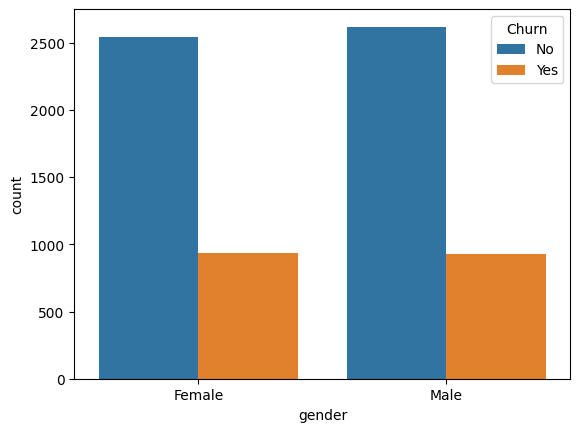

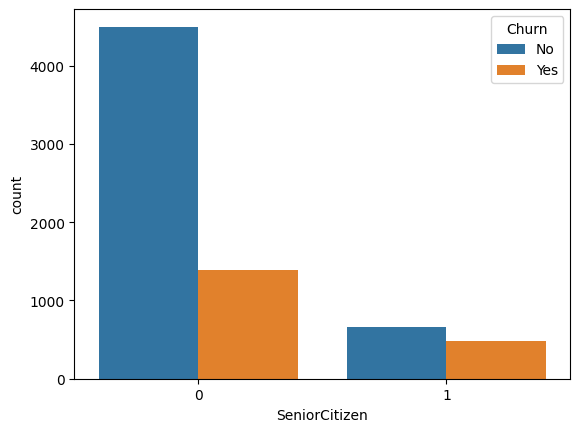

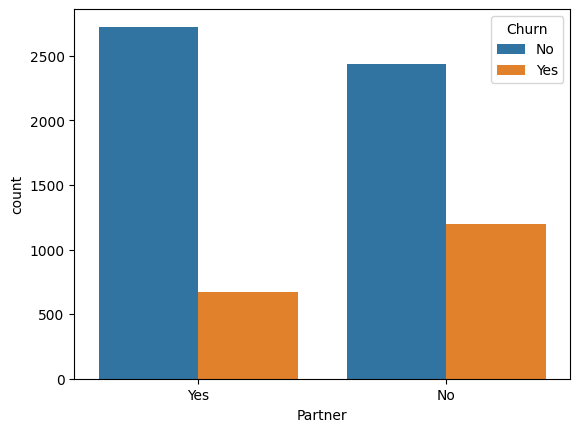

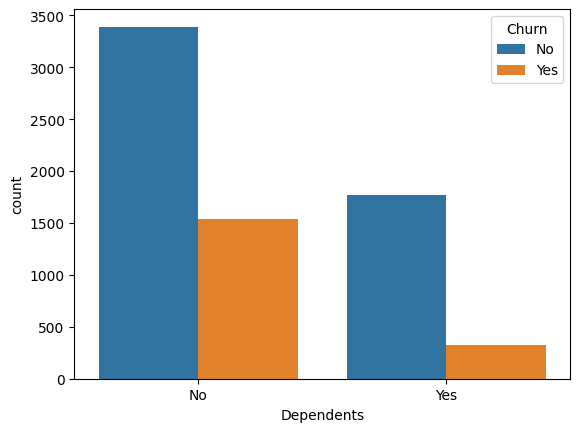

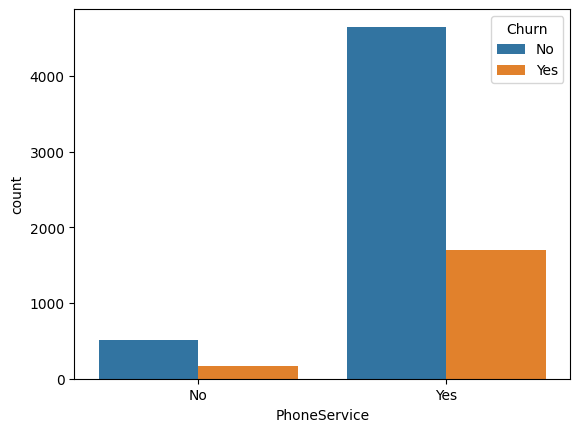

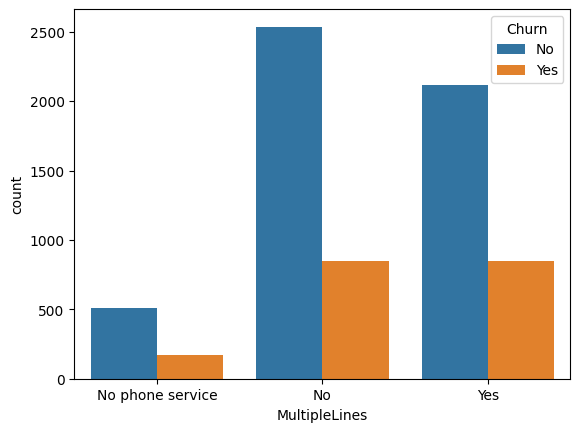

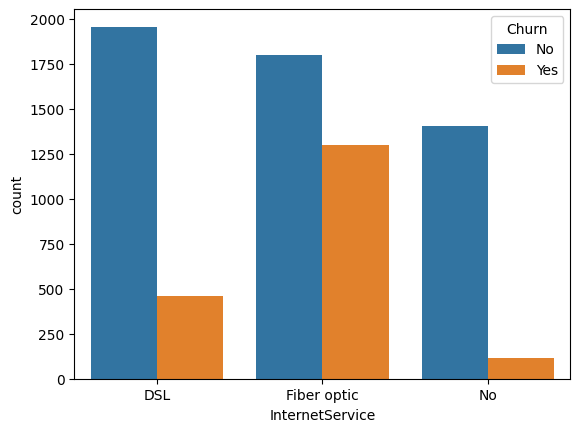

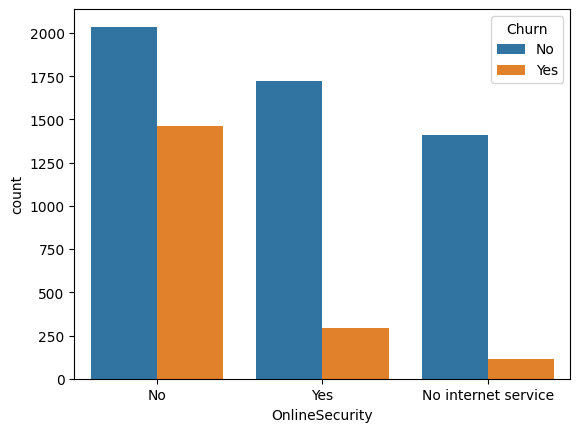

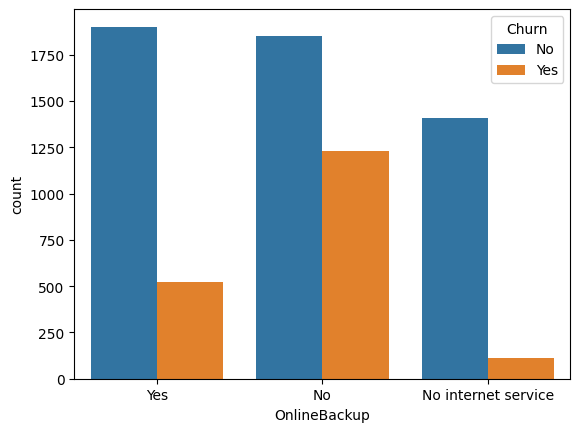

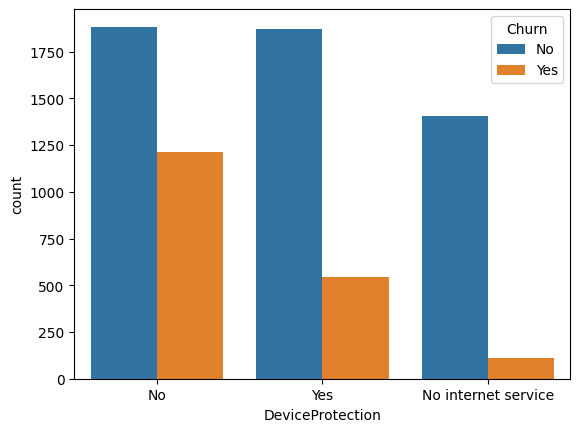

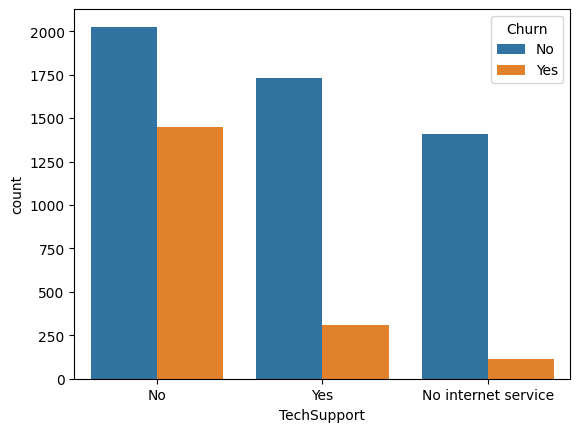

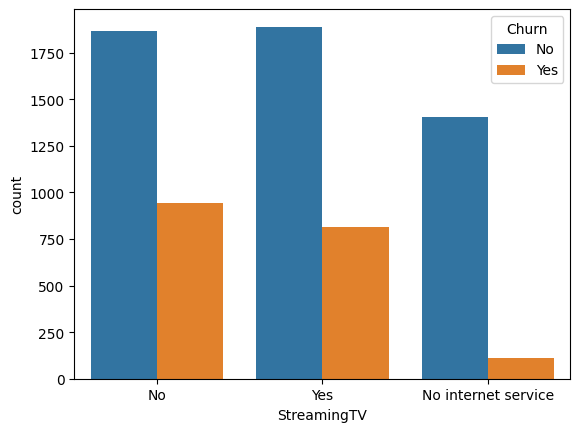

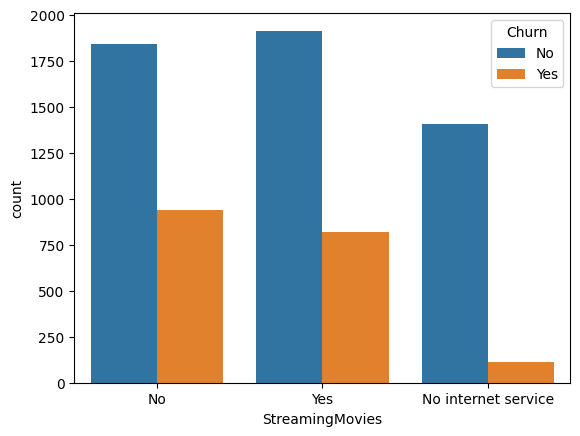

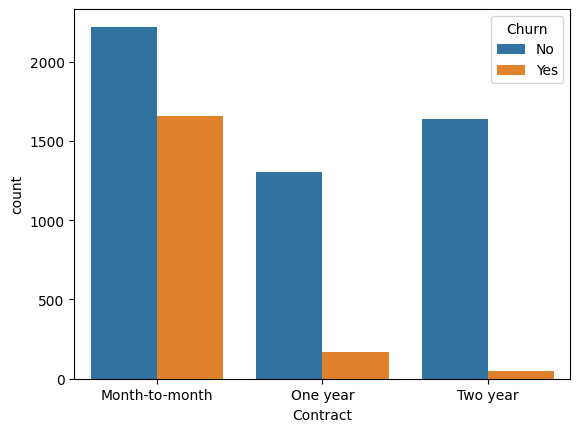

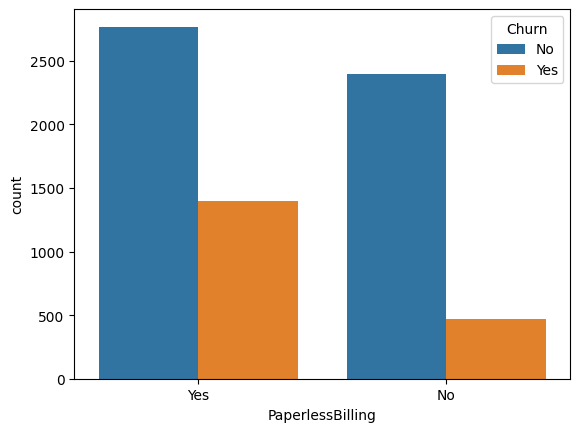

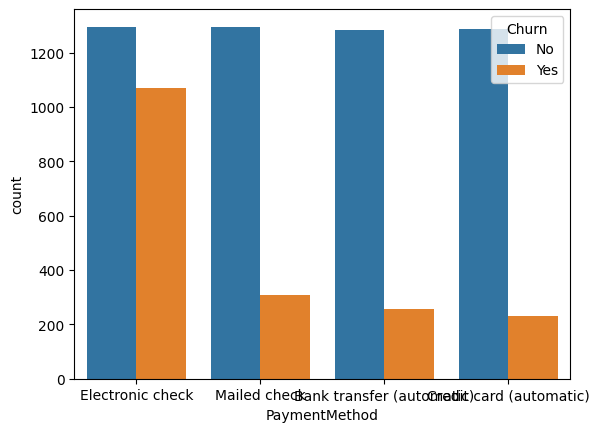

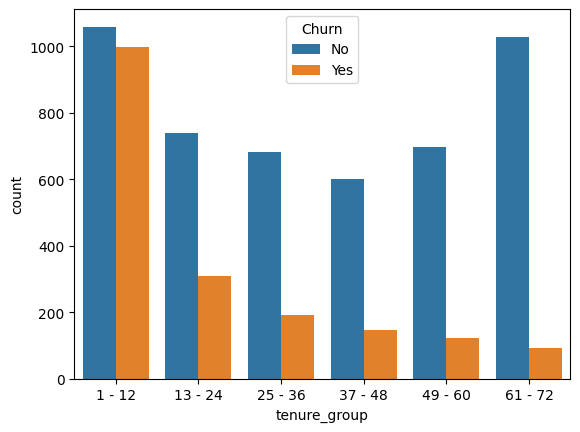

In [27]:
# Plotting distribution of individual predictors by churn

for i, predictor in enumerate(df2.drop(columns = ['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data = df2, x = predictor, hue = 'Churn')

In [28]:
# Converting the target variable 'Churn' to a binary variable i.e. Yes = 1 and No = 0
df2['Churn'] = np.where(df2.Churn == 'Yes', 1, 0)

In [29]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
3511,Male,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.60,1279.00,0,49 - 60
5230,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),94.35,5563.65,0,49 - 60
1057,Female,0,No,No,Yes,No,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,84.70,832.05,1,1 - 12


In [30]:
df2.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
tenure_group        category
dtype: object

In [31]:
# Converting all categorical variables into dummy variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le

LabelEncoder()

In [32]:
category = ['gender','SeniorCitizen', 'tenure_group' ,'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod',  'Churn']

df2[category] = df2[category].apply(le.fit_transform)

In [33]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0,3
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,0


<Axes: >

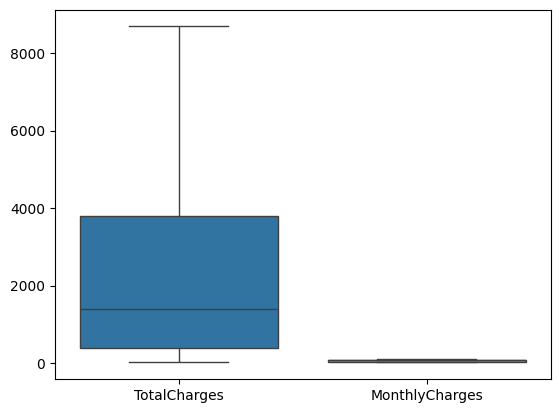

In [34]:
sns.boxplot(data = df2[['TotalCharges', 'MonthlyCharges']])

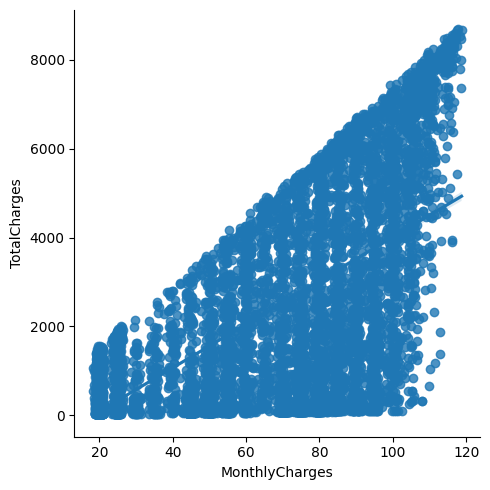

In [35]:
# Finding the relationship between Monthly Charges and Total Charges

sns.lmplot(data = df2, x = 'MonthlyCharges', y = 'TotalCharges')

Text(0.5, 1.0, 'Monthly Charges by Churn')

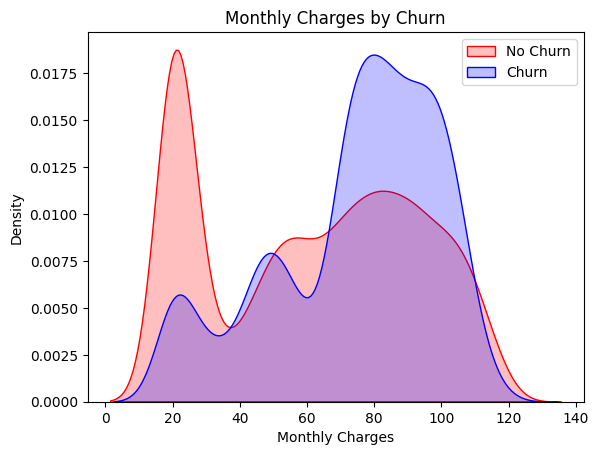

In [36]:
# KDE Plot for Churn by Monthly Charges and Total Charges

mth = sns.kdeplot(df2.MonthlyCharges[(df2['Churn'] == 0)],
                  color = "Red", shade = True)
mth = sns.kdeplot(df2.MonthlyCharges[(df2['Churn'] == 1)],
                  ax = mth, color = "Blue", shade = True)

mth.legend(['No Churn', 'Churn'])
mth.set_ylabel('Density')
mth.set_xlabel('Monthly Charges')
mth.set_title('Monthly Charges by Churn')


### Insight: Churn is high when Monthly Charges are high

<Axes: >

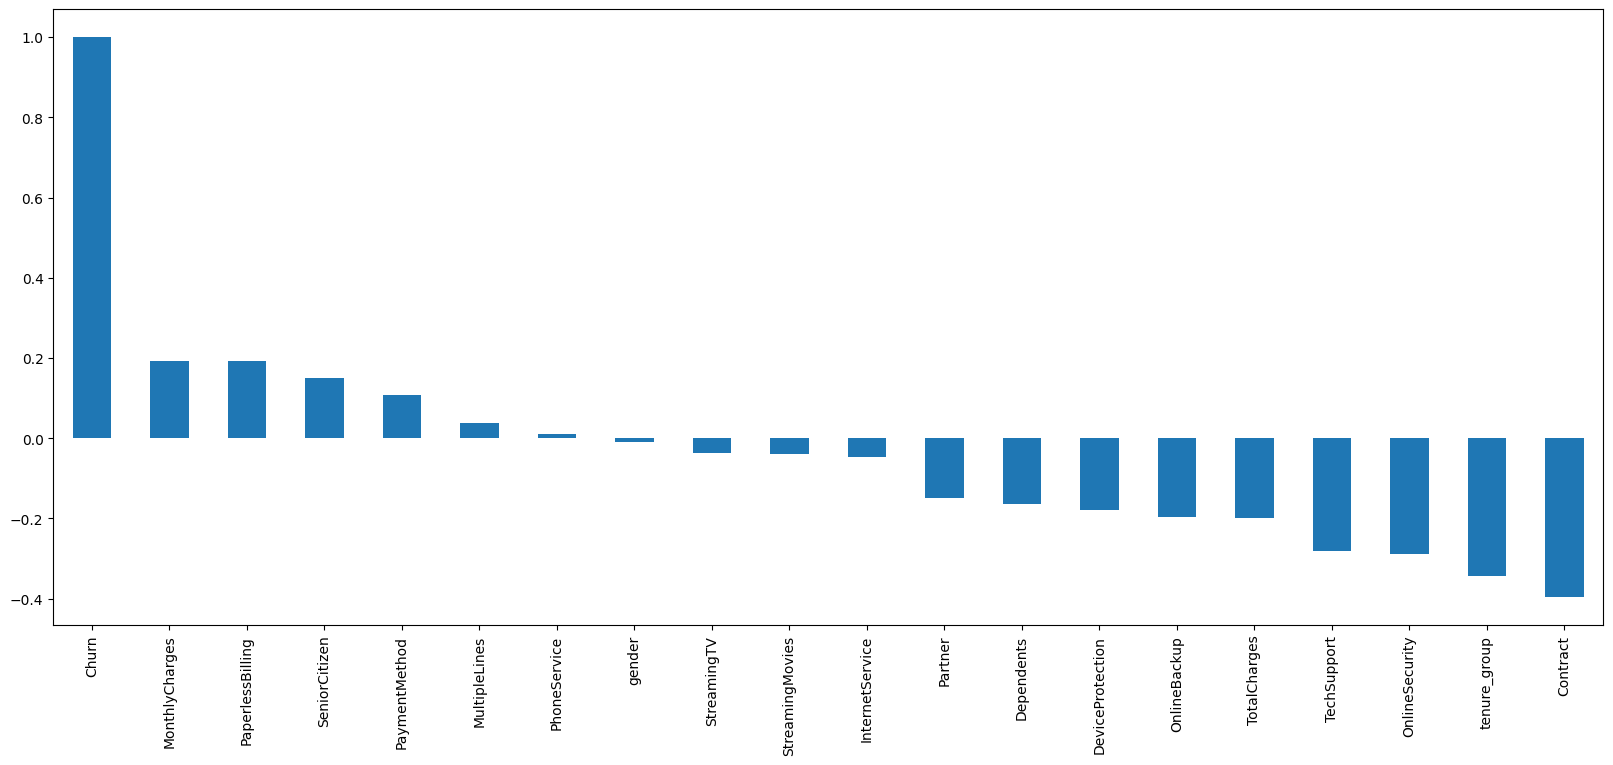

In [37]:
# Building a correlation of all predictors with 'Churn'
plt.figure(figsize = (20, 8))
df2.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

**Derived Insight:**

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

<Axes: >

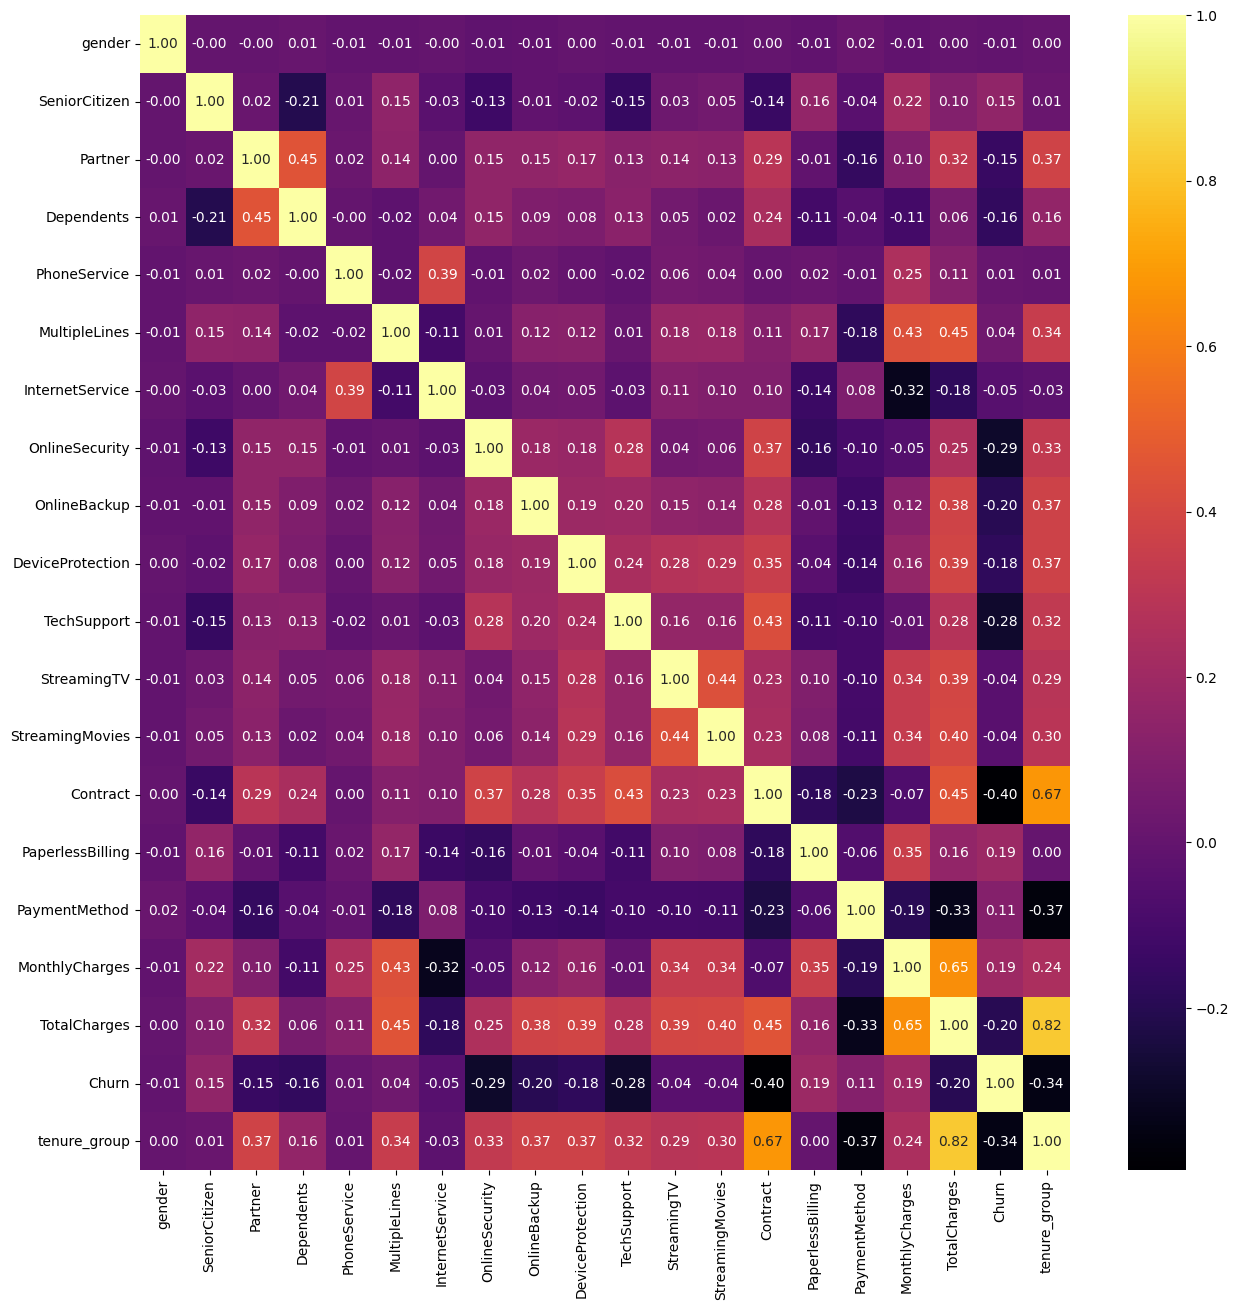

In [38]:
# Plotting the heatmap
plt.figure(figsize = (15, 15))
sns.heatmap(df2.corr(),annot = True, fmt=".2f", cmap = 'inferno')

## **Bivariate Analysis:**

In [39]:
new_df_target_0 = df2.loc[df2['Churn'] == 0]
new_df_target_1 = df2.loc[df2['Churn'] == 1]

In [40]:
def unique_plot(df, col, title, hue = None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(width, 8)
    # plt.xticks()
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x = col, order = df[col].value_counts().index, hue = hue, palette = 'dark')
    
    plt.show()

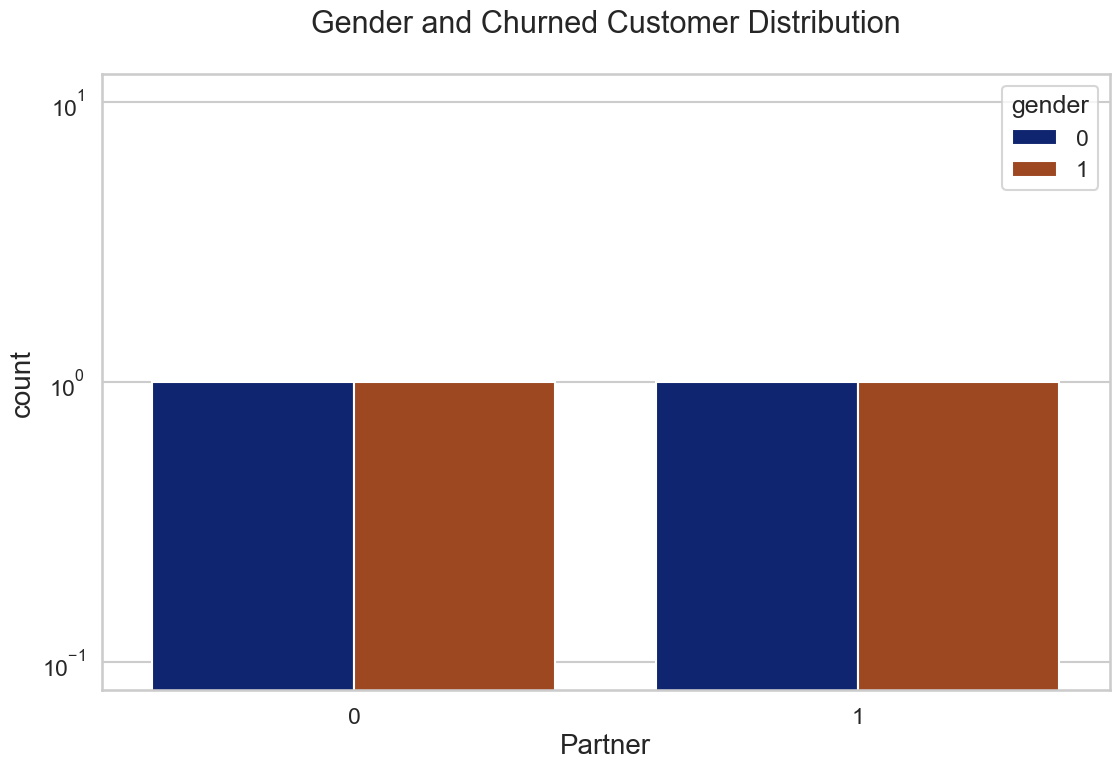

In [41]:
unique_plot(new_df_target_1, col = 'Partner', title = 'Gender and Churned Customer Distribution', hue = 'gender')

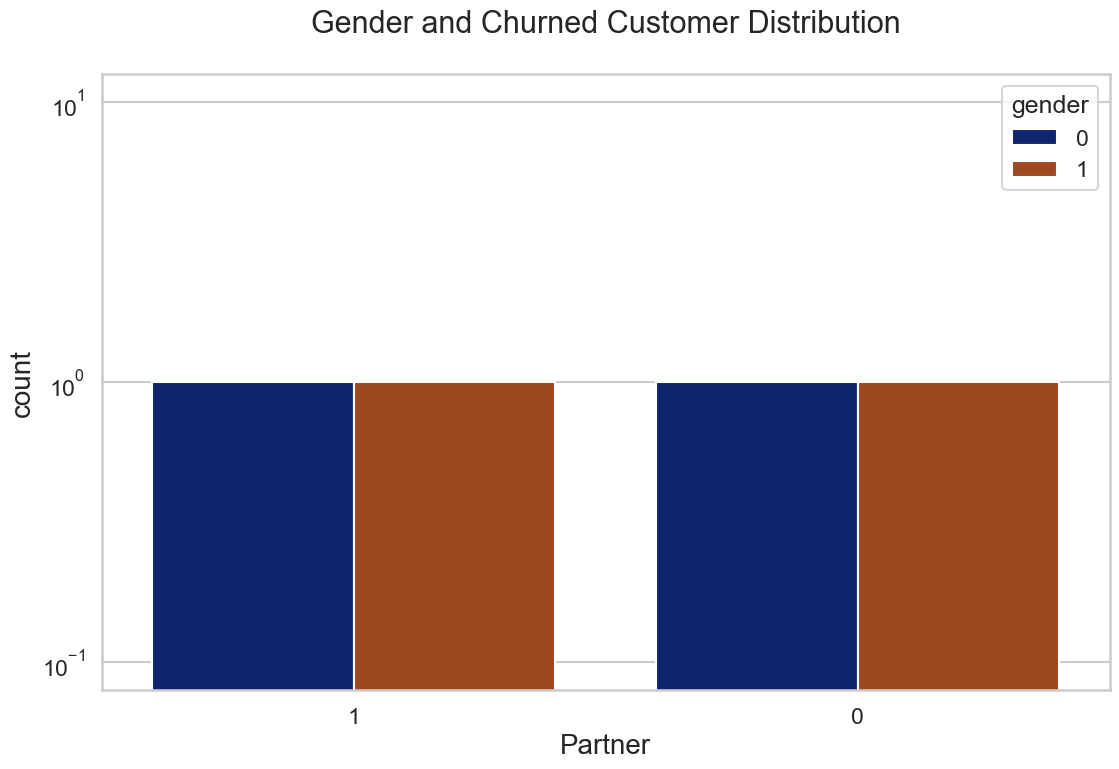

In [42]:
unique_plot(new_df_target_0, col = 'Partner', title = 'Gender and Churned Customer Distribution', hue = 'gender')

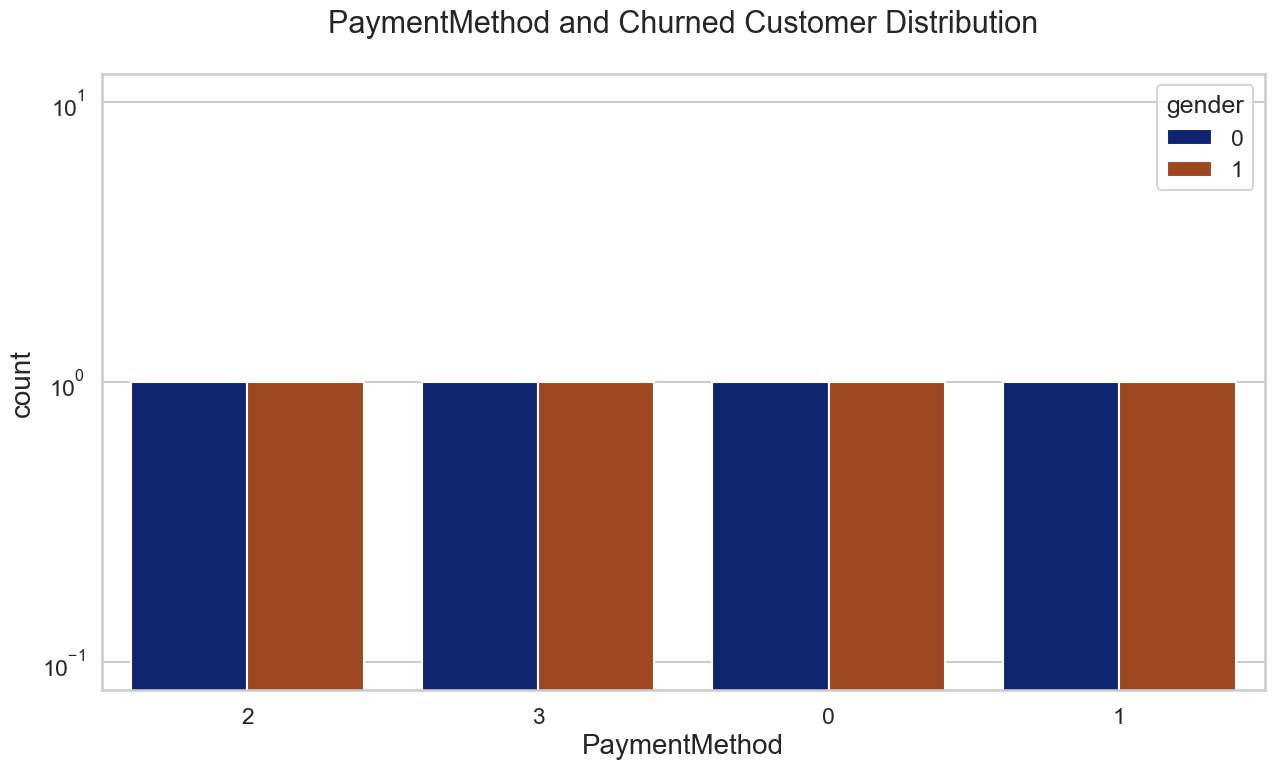

In [43]:
unique_plot(new_df_target_1, col = 'PaymentMethod', title = 'PaymentMethod and Churned Customer Distribution', hue = 'gender')

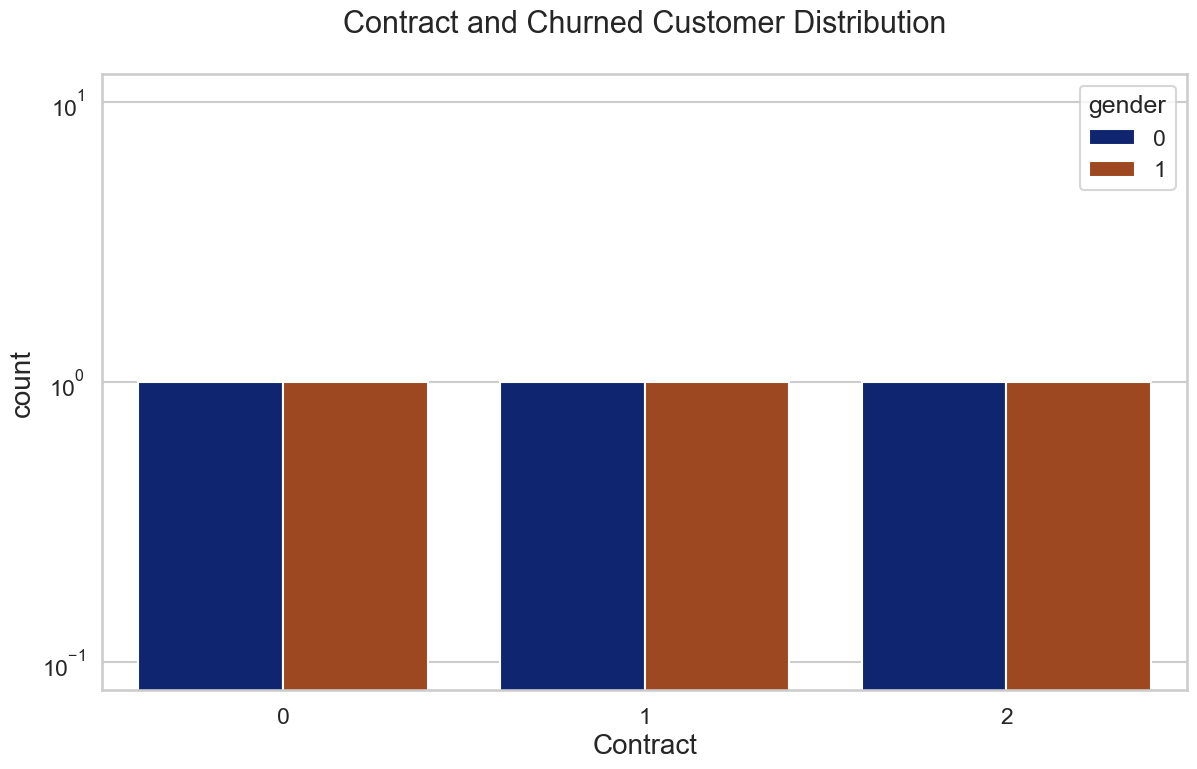

In [44]:
unique_plot(new_df_target_1, col = 'Contract', title = 'Contract and Churned Customer Distribution', hue = 'gender')

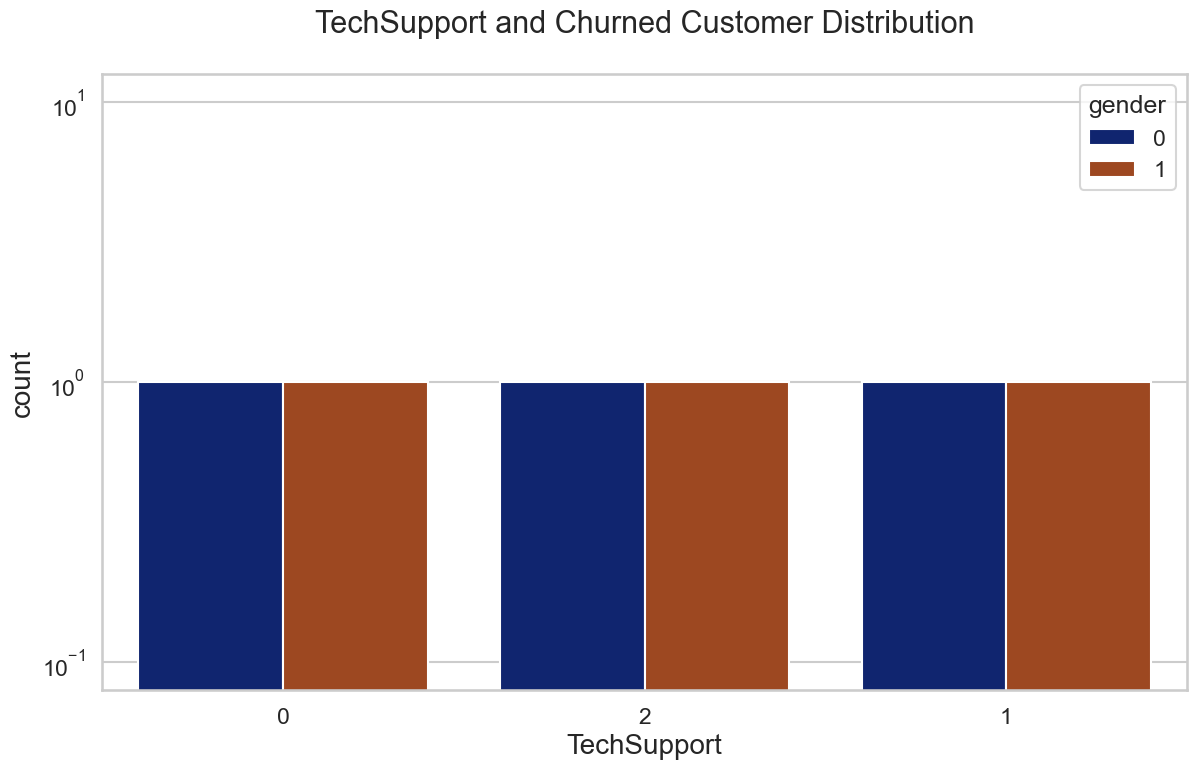

In [45]:
unique_plot(new_df_target_1, col = 'TechSupport', title = 'TechSupport and Churned Customer Distribution', hue = 'gender')

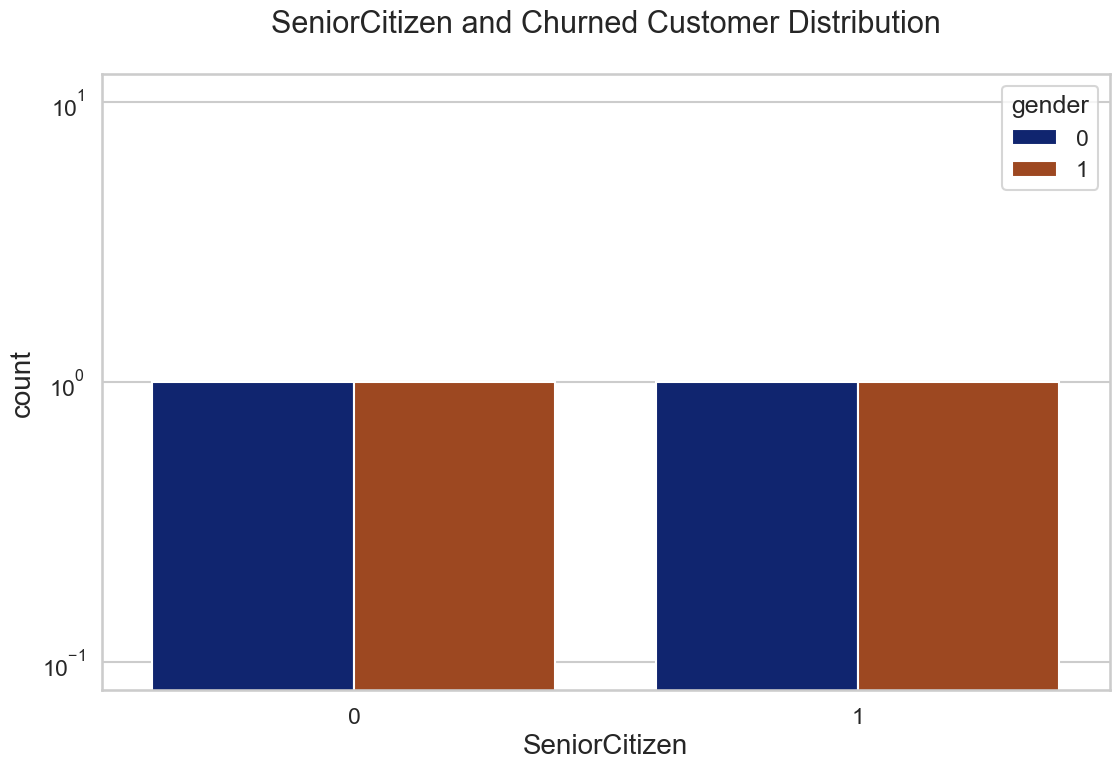

In [46]:
unique_plot(new_df_target_1, col = 'SeniorCitizen', title = 'SeniorCitizen and Churned Customer Distribution', hue = 'gender')

In [47]:
# Splitting the dependent variable

x = df2.drop('Churn', axis = 1)
y = df2['Churn']

In [48]:
x

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,3
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,2
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,6
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,0


In [49]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [50]:
df2['Churn'].value_counts() / len(df2)

Churn
0    0.734215
1    0.265785
Name: count, dtype: float64

Data is highly imbalanced

### **Train-Test_Split**

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [52]:
print('Training Data Shape: ', x_train.shape,  y_train.shape)
print('Testing Data Shape: ', x_test.shape,  y_test.shape)

Training Data Shape:  (5625, 19) (5625,)
Testing Data Shape:  (1407, 19) (1407,)


In [53]:
print(y_test.value_counts())
print(y_train.value_counts())

Churn
0    1033
1     374
Name: count, dtype: int64
Churn
0    4130
1    1495
Name: count, dtype: int64


The class imbalance we observed in the churn data is significant, with around `73.4%` non-churn customers (class `0`) and `26.6%` churn customers (class `1`). This kind of imbalance can lead to models that are biased toward predicting the majority class (non-churn), which may result in poor performance on the minority class (churn).

### **Handling Imbalanced Data**

**Oversampling the Minority Class:**

We can oversample the minority class (1 for churn) using techniques like `SMOTEENN (UpSampling + ENN)`. The main advantage of using SMOTEENN is that it addresses both overfitting and underfitting issues that can arise from class imbalance by generating synthetic samples and removing noisy ones.

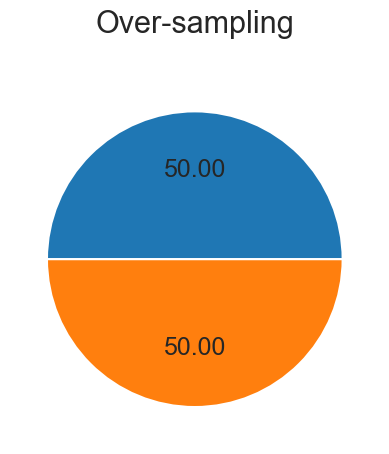

In [54]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_ovs, y_ovs = smote.fit_resample(x, y)

fig, oversp = plt.subplots()
oversp.pie(y_ovs.value_counts(), autopct = "%.2f")
oversp.set_title('Over-sampling')
plt.show()

In [55]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_ovs, y_ovs, test_size = 0.2, random_state = 42)

### **Logistic Regression**

In [56]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(xr_train, yr_train)

LogisticRegression()

In [57]:
y_pred = model_lr.predict(xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [58]:
model_lr.score(xr_test, yr_test)

0.797676669893514

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

report = classification_report(y_pred, yr_test)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       975
           1       0.83      0.78      0.80      1091

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



In [60]:
cm_lr = confusion_matrix(yr_test, y_pred)
cm_lr

array([[797, 240],
       [178, 851]])

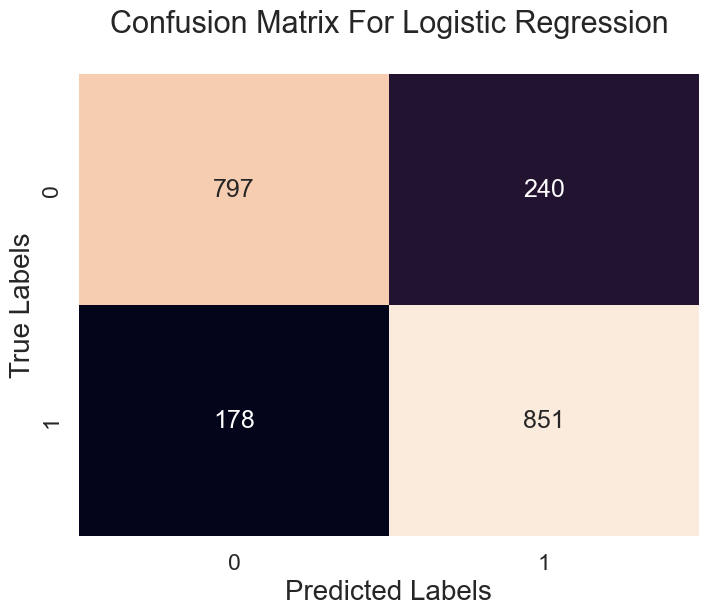

In [125]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_lr, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix For Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### **Decision Tree Classifier**

In [62]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf = 8)


In [63]:
model_dtc.fit(xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [64]:
y_pred_dtc = model_dtc.predict(xr_test)
y_pred_dtc[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [65]:
yr_test[:10]

4139    1
1692    0
2692    0
7704    1
321     0
9752    1
39      1
3813    0
7396    1
2613    0
Name: Churn, dtype: int64

In [66]:
model_dtc.score(xr_test, yr_test)

0.8107454017424975

In [67]:
print(classification_report(yr_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1037
           1       0.78      0.86      0.82      1029

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



In [68]:
cm_dtc = confusion_matrix(yr_test, y_pred_dtc)
cm_dtc

array([[795, 242],
       [149, 880]])

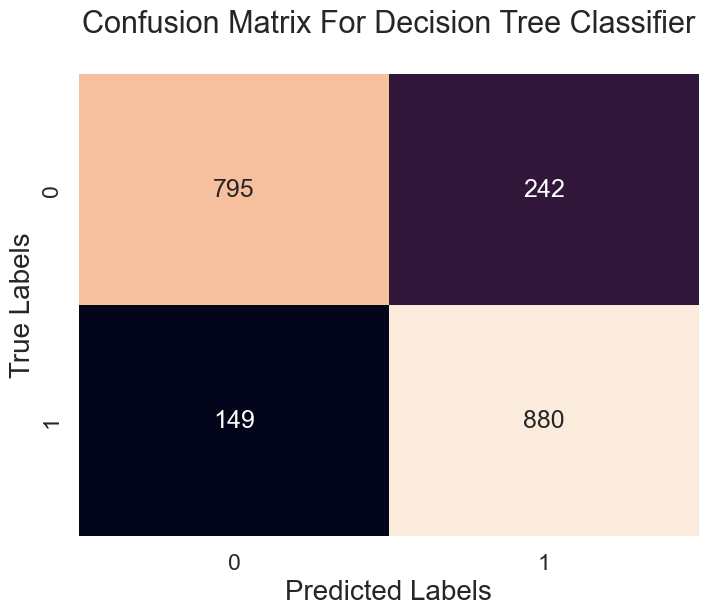

In [126]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_dtc, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix For Decision Tree Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### **Random Forest Classifier**

In [70]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators = 100, random_state = 100, max_depth = 6, min_samples_leaf = 8, class_weight = 'balanced')

In [71]:
model_rfc.fit(xr_train, yr_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=8,
                       random_state=100)

In [72]:
y_pred_rfc = model_rfc.predict(xr_test)
y_pred_rfc[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [73]:
yr_test[:10]

4139    1
1692    0
2692    0
7704    1
321     0
9752    1
39      1
3813    0
7396    1
2613    0
Name: Churn, dtype: int64

In [74]:
model_rfc.score(xr_test, yr_test)

0.8184898354307841

In [75]:
print(classification_report(y_pred_rfc, yr_test))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       932
           1       0.87      0.79      0.83      1134

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



In [76]:
cm_rfc = confusion_matrix(yr_test, y_pred_rfc)
cm_rfc

array([[797, 240],
       [135, 894]])

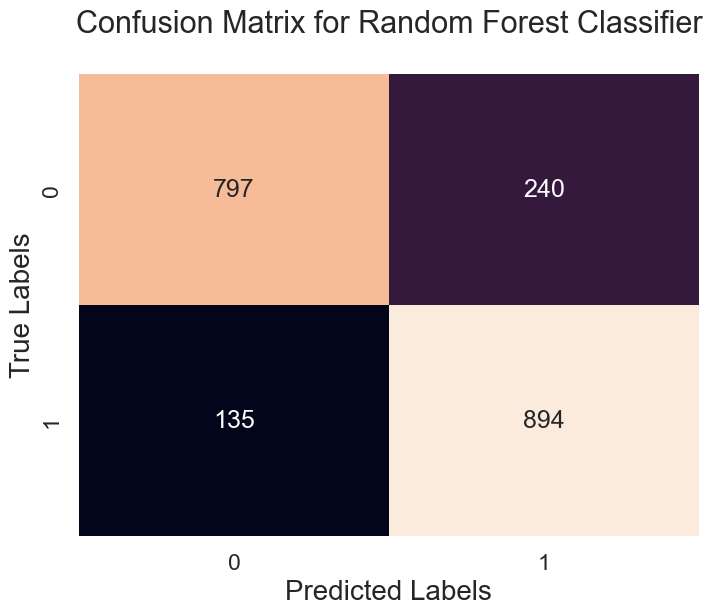

In [127]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_rfc, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### **AdaBoost**

In [78]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(n_estimators = 100)
model_ada.fit(xr_train, yr_train)

AdaBoostClassifier(n_estimators=100)

In [79]:
y_pred_ada = model_ada.predict(xr_test)

In [80]:
print(classification_report(y_pred_ada, yr_test))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       948
           1       0.86      0.80      0.83      1118

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.83      0.82      0.82      2066



In [81]:
cm_ada = confusion_matrix(yr_test, y_pred_ada)
cm_ada

array([[808, 229],
       [140, 889]])

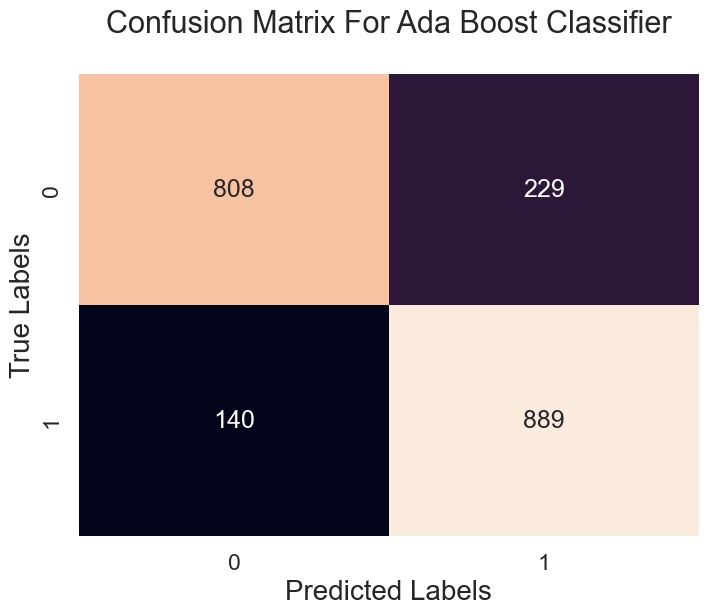

In [129]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_ada, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix For Ada Boost Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### **Gradient Boost Classifier**

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

model_gbc = GradientBoostingClassifier()
model_gbc.fit(xr_train, yr_train)

GradientBoostingClassifier()

In [84]:
y_pred_gbc = model_gbc.predict(xr_test)
y_pred_gbc[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [85]:
yr_test[:10]

4139    1
1692    0
2692    0
7704    1
321     0
9752    1
39      1
3813    0
7396    1
2613    0
Name: Churn, dtype: int64

In [86]:
print(classification_report(yr_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1037
           1       0.80      0.86      0.83      1029

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



In [87]:
cm_gbc = confusion_matrix(yr_test, y_pred_gbc)
cm_gbc

array([[819, 218],
       [149, 880]])

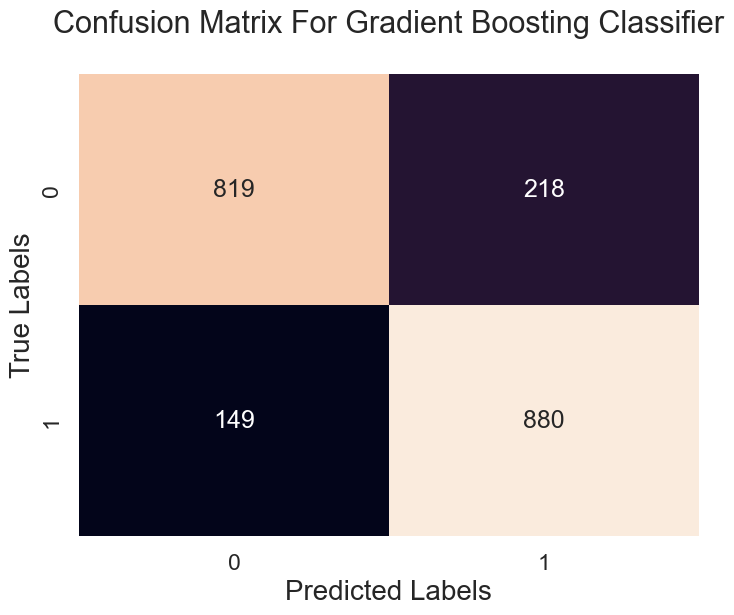

In [130]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_gbc, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix For Gradient Boosting Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### **Xgboost**

In [89]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(class_weight = {0:1, 1:2})
model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 1, 1: 2}, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [90]:
model_xgb.fit(xr_train, yr_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 1, 1: 2}, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [91]:
y_pred_xgb = model_xgb.predict(xr_test)
y_pred_xgb[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [92]:
yr_test[:10]

4139    1
1692    0
2692    0
7704    1
321     0
9752    1
39      1
3813    0
7396    1
2613    0
Name: Churn, dtype: int64

In [93]:
print(classification_report(y_pred_xgb, yr_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1015
           1       0.85      0.83      0.84      1051

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



In [94]:
cm_xgb = confusion_matrix(yr_test, y_pred_xgb)
cm_xgb

array([[861, 176],
       [154, 875]])

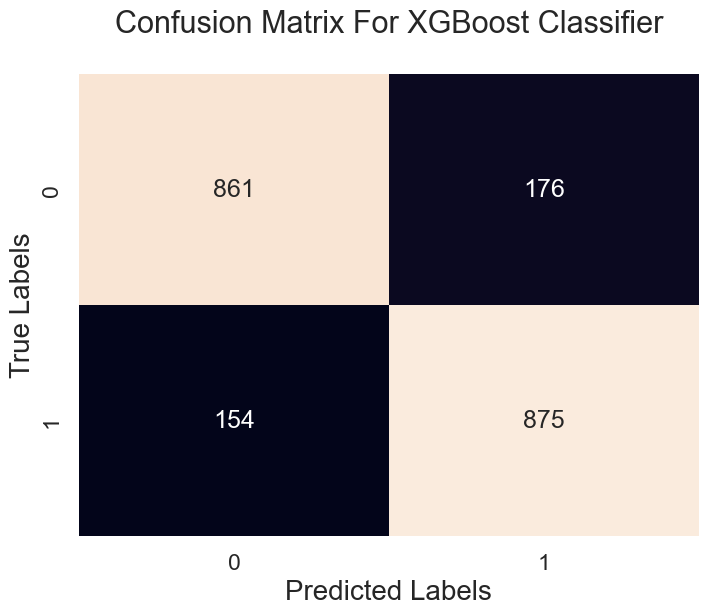

In [131]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix For XGBoost Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Selecting the XGBoost for the final model.

In [97]:
# Finding the best hyperparameter 

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import time

# Defining the XGBClassifier and param_dist
model = XGBClassifier()
param_dist = {
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Creating RandomizedSearchCV object with fewer iterations
random_search = RandomizedSearchCV(estimator = model, param_distributions = param_dist, n_iter = 5, cv = 10, scoring = 'accuracy', random_state = 42)

# Start the timer
start_time = time.time()

# Fit the RandomizedSearchCV object with fewer iterations
random_search.fit(xr_train, yr_train)

# Stop the timer
end_time =  time.time()

# Calculating the total time
total_time = end_time - start_time

print("RandomizedSearchCV took {:.2f} seconds to run".format(total_time))

# Getting the best parameters
best_params = random_search.best_params_
print("Best Parametres: ", best_params)


RandomizedSearchCV took 12.04 seconds to run
Best Parametres:  {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 5, 'learning_rate': 0.1}


### **Creating Final Model**

In [98]:
from xgboost import XGBClassifier

# Defining the best hyperparameters obtained from the grid search
best_params = {
    'n_estimators': 200,
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_samples_split': 2
}

# Creating an XGBClassifier instance with the best hyperparameters
final_xgb_model = XGBClassifier(**best_params)

# Training the final model on the training data
final_xgb_model.fit(xr_train, yr_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, min_samples_split=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [99]:
from sklearn.model_selection import cross_val_score

# cv = 10 is used for 10 - fold cross validation
cv_score = cross_val_score(final_xgb_model, xr_train, yr_train, cv =10, scoring = 'accuracy')

# Printing the cross-validation scores
print("Cross-validation scores: ", cv_score)
print("Mean CV Score: ", cv_score.mean())


Cross-validation scores:  [0.83898305 0.86198547 0.84140436 0.85835351 0.85835351 0.84624697
 0.8220339  0.84140436 0.8220339  0.86077482]
Mean CV Score:  0.8451573849878935


In [107]:
y_pred_xgb_final = final_xgb_model.predict(xr_test)
y_pred_xgb_final[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [106]:
yr_test[:10]

4139    1
1692    0
2692    0
7704    1
321     0
9752    1
39      1
3813    0
7396    1
2613    0
Name: Churn, dtype: int64

In [108]:
print(classification_report(y_pred_xgb_final, yr_test))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1012
           1       0.85      0.83      0.84      1054

    accuracy                           0.83      2066
   macro avg       0.83      0.84      0.83      2066
weighted avg       0.84      0.83      0.83      2066



In [109]:
cm_final_xgb = confusion_matrix(y_pred_xgb_final, yr_test)
cm_final_xgb

array([[854, 158],
       [183, 871]])

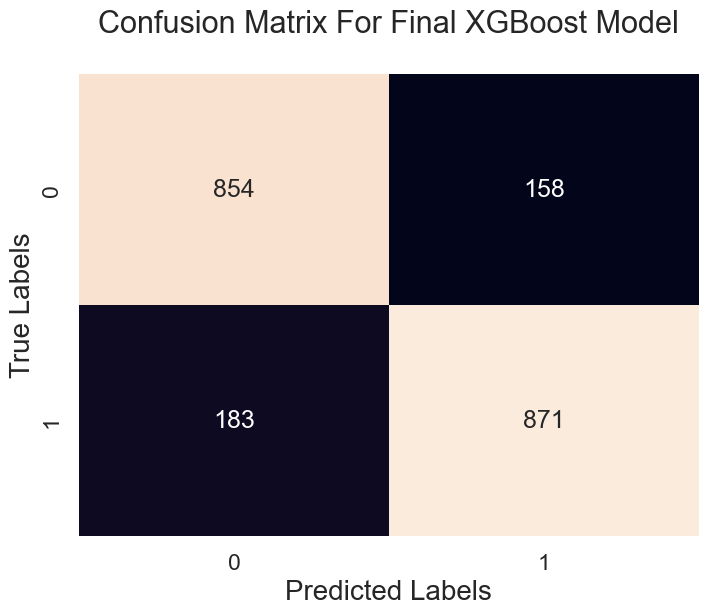

In [110]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_final_xgb, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix For Final XGBoost Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [111]:
# Saving the final model with pickle

import pickle

with open('final_xgb_model.pkl', 'wb') as file:
    pickle.dump(final_xgb_model, file)

Checking the accuracy with our features

In [112]:
import pickle
import pandas as pd

# Load the saved model from the pickle file
with open('final_xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Prepare your own data for testing
# Create a DataFrame with your feature data
your_features = pd.DataFrame({
    'gender': [1, 0, 0, 0, 0],
    'SeniorCitizen': [0, 0, 0, 0, 0],
    'Partner': [0, 0, 0, 1, 1],
    'Dependents': [0, 0, 0, 0, 1],
    'PhoneService': [1, 0, 1, 1, 1],
    'MultipleLines': [0, 0, 0, 2, 2],
    'InternetService': [1, 0, 1, 1, 0],
    'OnlineSecurity': [0, 0, 0, 2, 2],
    'OnlineBackup': [0, 0, 1, 2, 2],
    'DeviceProtection': [0, 0, 0, 0, 2],
    'TechSupport': [0, 0, 0, 2, 2],
    'StreamingTV': [0, 1, 0, 0, 0],
    'StreamingMovies': [0, 1, 0, 0, 0],
    'Contract': [2, 0, 0, 1, 2],
    'PaperlessBilling': [0, 1, 0, 0, 0],
    'PaymentMethod': [1, 1, 1, 0, 0],
    'MonthlyCharges': [90.407734, 58.273891, 74.379767, 108.55, 64.35],
    'TotalCharges': [707.535237, 3264.466697, 1146.937795, 5610.7, 1558.65],
    'tenure_group': [0, 4, 1, 4, 2]
})

# Make predictions using the loaded model on your own data
predictions = loaded_model.predict(your_features)

# Print the predictions
print("Predictions:", predictions)


Predictions: [0 1 1 0 0]


### **Creating another model with GradientBoostingClassifier**

In [113]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import time

# Define your GradientBoostingClassifier and param_dist
model = GradientBoostingClassifier()
param_dist = {
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Create RandomizedSearchCV object with fewer iterations
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=5, cv=10, scoring='accuracy', random_state=42)

# Start the timer
start_time = time.time()

# Fit the RandomizedSearchCV object
random_search.fit(xr_train, yr_train)

# Stop the timer
end_time = time.time()

# Calculate the total time taken
total_time = end_time - start_time

print("RandomizedSearchCV took {:.2f} seconds to complete.".format(total_time))

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


RandomizedSearchCV took 198.62 seconds to complete.
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 5, 'learning_rate': 0.1}


In [114]:
from sklearn.ensemble import GradientBoostingClassifier

# Defining the best hyperparameters obtained from GridSearchCV
best_params = {
    'n_estimators': 200,
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_samples_split': 2
}

# Creating Gradient Boosting Classifier with the best hyperparameters

final_gb_model = GradientBoostingClassifier(**best_params)

# Train the Gradient model on the training data
final_gb_model.fit(xr_train, yr_train)


GradientBoostingClassifier(max_depth=5, n_estimators=200)

In [115]:
from sklearn.model_selection import cross_val_score

# cv=10 indicates 10-fold cross-validation
cv_score_gb = cross_val_score(final_gb_model, xr_train, yr_train, cv = 10, scoring = 'accuracy')

# Printing the cross-validation score
print("Cross-validation Scores: ", cv_score)
print("Mean Cross-validation Score: ", cv_score_gb.mean())


Cross-validation Scores:  [0.83898305 0.86198547 0.84140436 0.85835351 0.85835351 0.84624697
 0.8220339  0.84140436 0.8220339  0.86077482]
Mean Cross-validation Score:  0.8497578692493946


In [117]:
y_pred_gb_final = final_gb_model.predict(xr_test)
y_pred_gb_final[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [118]:
yr_test[:10]

4139    1
1692    0
2692    0
7704    1
321     0
9752    1
39      1
3813    0
7396    1
2613    0
Name: Churn, dtype: int64

In [119]:
print(classification_report(y_pred_gb_final, yr_test))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1014
           1       0.84      0.82      0.83      1052

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [120]:
cm_final_gb = confusion_matrix(y_pred_gb_final, yr_test)
cm_final_gb

array([[851, 163],
       [186, 866]])

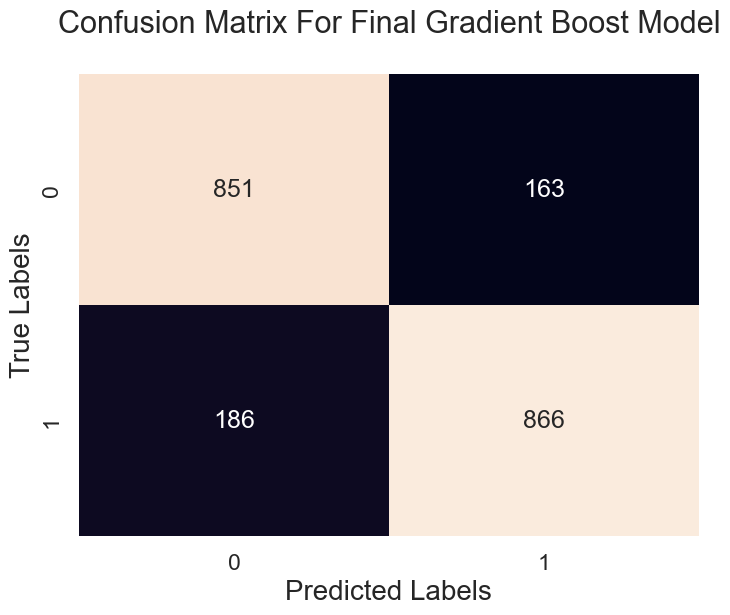

In [121]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_final_gb, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix For Final Gradient Boost Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [122]:
# Saving the final model with pickle

import pickle

with open('final_gb_model.pkl', 'wb') as file:
    pickle.dump(final_gb_model, file)

In [124]:
# Checking accuracy with our features

import pickle
import pandas as pd

# Load the saved model from the pickle file
with open('final_gb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Prepare your own data for testing
# Create a DataFrame with your feature data
features = pd.DataFrame({
    'gender': [1, 0, 0, 0, 0],
    'SeniorCitizen': [0, 0, 0, 0, 0],
    'Partner': [0, 0, 0, 1, 1],
    'Dependents': [0, 0, 0, 0, 1],
    'PhoneService': [1, 0, 1, 1, 1],
    'MultipleLines': [0, 0, 0, 2, 2],
    'InternetService': [1, 0, 1, 1, 0],
    'OnlineSecurity': [0, 0, 0, 2, 2],
    'OnlineBackup': [0, 0, 1, 2, 2],
    'DeviceProtection': [0, 0, 0, 0, 2],
    'TechSupport': [0, 0, 0, 2, 2],
    'StreamingTV': [0, 1, 0, 0, 0],
    'StreamingMovies': [0, 1, 0, 0, 0],
    'Contract': [2, 0, 0, 1, 2],
    'PaperlessBilling': [0, 1, 0, 0, 0],
    'PaymentMethod': [1, 1, 1, 0, 0],
    'MonthlyCharges': [90.407734, 58.273891, 74.379767, 108.55, 64.35],
    'TotalCharges': [707.535237, 3264.466697, 1146.937795, 5610.7, 1558.65],
    'tenure_group': [0, 4, 1, 4, 2]
})

# Make predictions using the loaded model on your own data
predictions = loaded_model.predict(features)

# Print the predictions
print("Predictions:", predictions)


Predictions: [0 1 1 0 0]


### **Plotting the AUC & ROC Curve fro all models**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

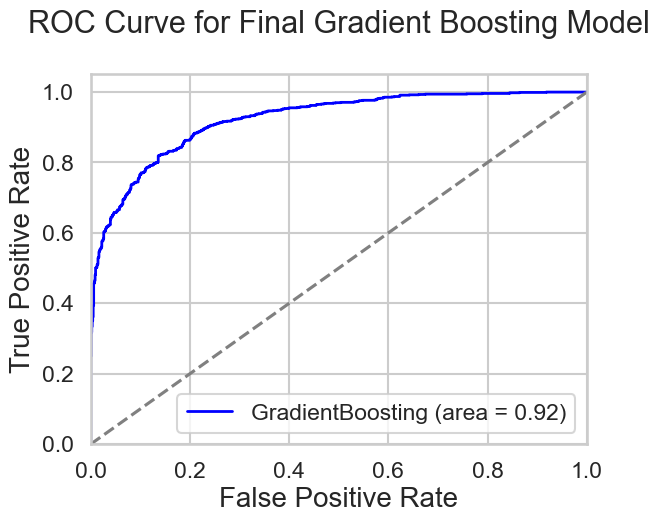

In [137]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob = final_gb_model.predict_proba(xr_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(yr_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='GradientBoosting (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Final Gradient Boosting Model')
plt.legend(loc="lower right")
plt.show()


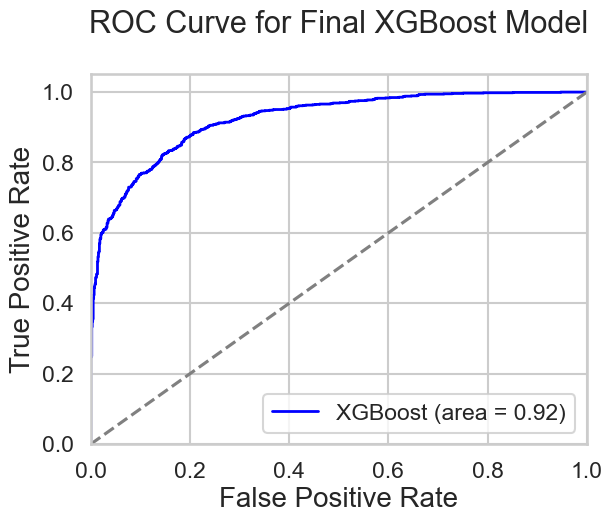

In [138]:
# Get predicted probabilities for the positive class
y_prob = final_xgb_model.predict_proba(xr_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(yr_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='XGBoost (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Final XGBoost Model')
plt.legend(loc="lower right")
plt.show()

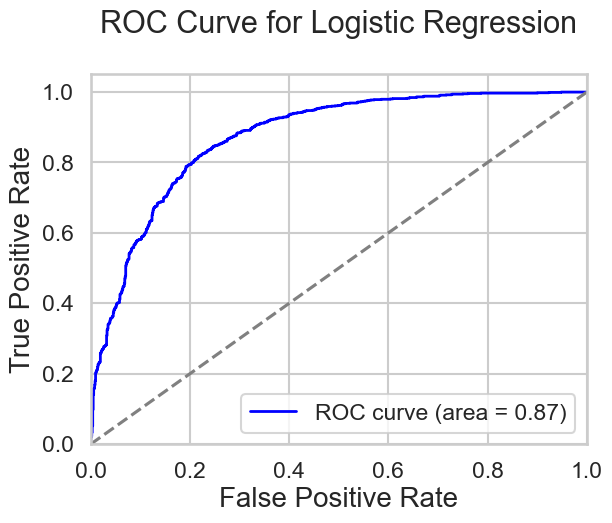

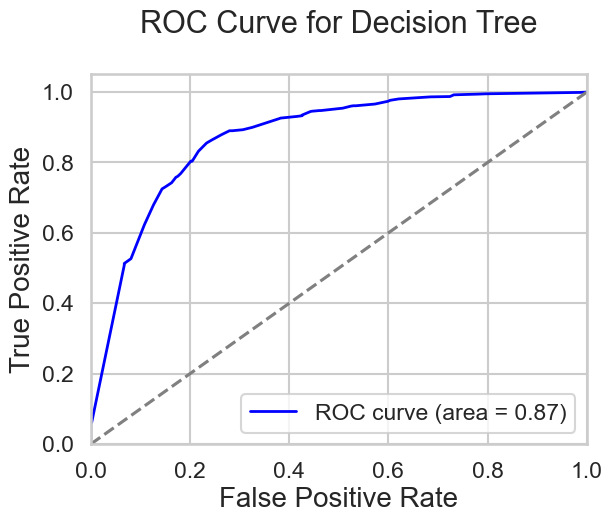

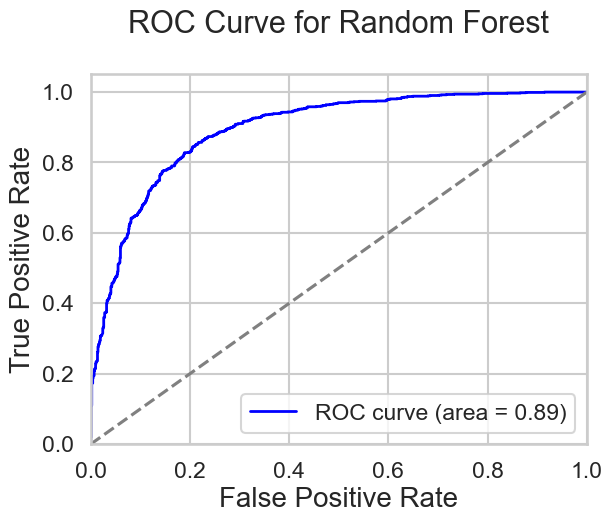

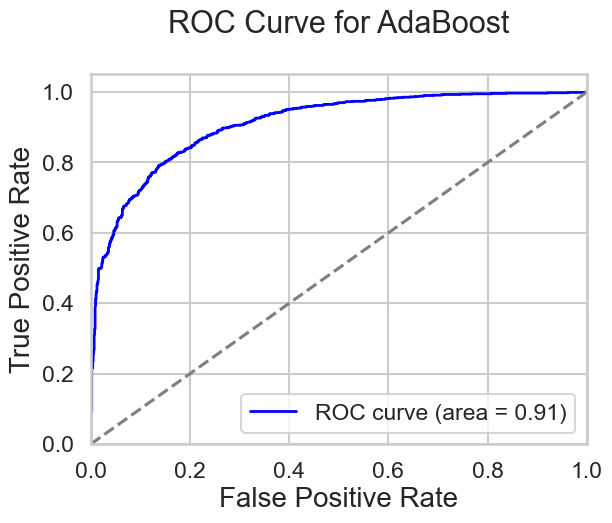

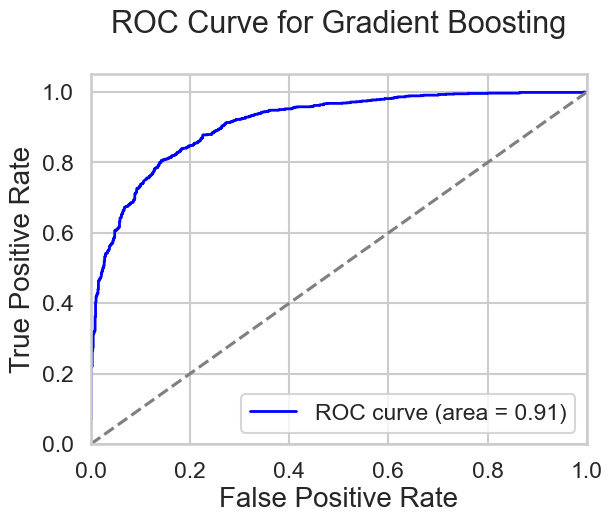

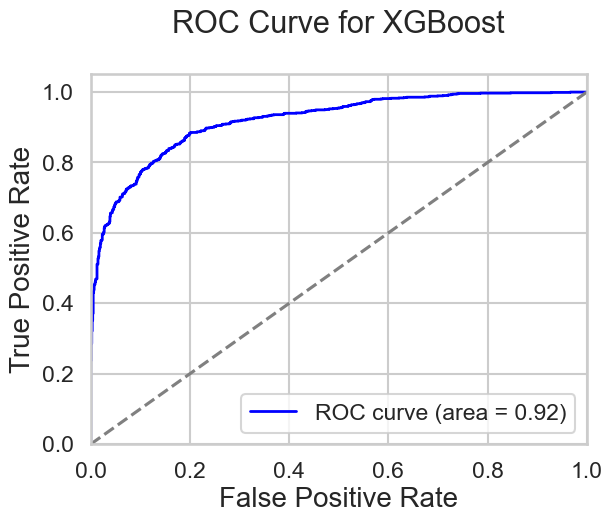

In [139]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define your fitted models and their names
models = {
    'Logistic Regression': model_lr,
    'Decision Tree': model_dtc,
    'Random Forest': model_rfc,
    'AdaBoost': model_ada,
    'Gradient Boosting': model_gbc,
    'XGBoost': model_xgb
}

y_test = yr_test  
X_test = xr_test  

# Iterate over the models and plot the ROC curve for each one
for model_name, model in models.items():
    # Get predicted probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    
    # Save the plot with the model name
    plt.savefig(f'roc_curve_{model_name}.png')
    
    # Display the plot
    plt.show()
